# Zero to Hero ML Workshop
Conducted by Akash & Marcus (AI Club Data Science Trainers) <br/>
## What's covered in this notebook:
1. Data Loading
2. Data Cleaning + Exploration + Preprocessing
3. Machine Learning
4. Conclusion

Before we begin: download the datasets here. total of 6 files. <br/>

https://www.kaggle.com/datasets/marcusngjh/hdb-resale-flat-prices

# Data Loading

If you're using Google Colab / Jupyter Notebook: Run the cell below

In [ ]:
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotblib
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

Change file directory by copying "relative file path"

In [2]:
price1999 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2020 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
price1999.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


Quick and easy way to visualise the five datasets

In [4]:
print("1990 to 1999: \n", price1999.columns)
print("\n 1999 to 2012: \n", price2012.columns)
print("\n 2012 to 2014: \n", price2014.columns)
print("\n 2014 to 2016: \n", price2016.columns)
print("\n 2016 to 2020: \n", price2020.columns)

1990 to 1999: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 1999 to 2012: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2012 to 2014: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2014 to 2016: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2016 to 2020: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='objec

Important when doing feature engineering (making sure the ML model is able to ingest our data)

In [5]:
price1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287200 entries, 0 to 287199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287200 non-null  object 
 1   town                 287200 non-null  object 
 2   flat_type            287200 non-null  object 
 3   block                287200 non-null  object 
 4   street_name          287200 non-null  object 
 5   storey_range         287200 non-null  object 
 6   floor_area_sqm       287200 non-null  float64
 7   flat_model           287200 non-null  object 
 8   lease_commence_date  287200 non-null  int64  
 9   resale_price         287200 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


Notice that month is an object data type <br/>
Convert to DateTime series for easier data processing and feature engineering.

## Merge DataFrames

Easier to manage and makes model training alot more efficient (determine trends)

In [6]:
prices = pd.concat([price1999, price2012, price2014, price2016, price2020], ignore_index=True, sort=False)
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841631 entries, 0 to 841630
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                841631 non-null  object 
 1   town                 841631 non-null  object 
 2   flat_type            841631 non-null  object 
 3   block                841631 non-null  object 
 4   street_name          841631 non-null  object 
 5   storey_range         841631 non-null  object 
 6   floor_area_sqm       841631 non-null  float64
 7   flat_model           841631 non-null  object 
 8   lease_commence_date  841631 non-null  int64  
 9   resale_price         841631 non-null  float64
 10  remaining_lease      80374 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 70.6+ MB


Note that "month" is an object Dtype - convert to datetime to simplify feature engineering / data engineering process

In [7]:
prices['month'] = pd.to_datetime(prices['month']) # to datetime for feature engineering

Check for NAs (missing values) in overall dataframe

In [8]:
prices[~prices.isnull().any(axis=1)]['month'].dt.year.unique()

array([2017, 2018, 2019, 2020], dtype=int64)

Easier way to do this (option 2) <br/> <br/>
```unique_years = prices.dropna()['month'].dt.year.unique()```

## Inflation Adjustment using CPI (Consumer Price Index)

I had queries on left merge so hope this clears things up:

When merging `prices` with `cpi` using `how='left'`, all records from `prices` are retained, matching data from `cpi` where possible. This method is ideal when preserving all original data from `prices` is necessary, even if no exact `cpi` match exists. 

If the `cpi` dataset contains data for only one month and `prices` has multiple dates within that month, the merge matches based on the exact 'month' values. Entries in `prices` outside the single month in `cpi` will have `NaN` for `cpi`-related fields post-merge.

For `prices` entries without a `cpi` match, resulting `NaN` values in the merged DataFrame require handling, such as filling, dropping, or inferring `cpi` values, to ensure the analysis remains robust.


In [ ]:
# Compute Resale Price Adjusted for Inflation Using Consumer Price Index for Housing & Utilities
# https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data

cpi = pd.read_csv('./input/resale-flat-prices/CPI.csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
prices = prices.merge(cpi, on='month', how='left')
prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100

# Data Cleaning / Preprocessing

### Convert remaining_lease to number of years

The code standardizes the `remaining_lease` field in the `prices` DataFrame, converting mixed representations of lease durations (years and months as strings, or years as integers) into a uniform numeric format (years, including fractions for months).

### Purpose:
- **Uniformity**: Ensures lease durations are consistently expressed in years for straightforward comparisons and analyses.
- **Comparative Analysis**: Facilitates direct comparisons of property leases.
- **Statistical Analysis**: Enables accurate statistical computations (averages, medians) on lease durations.

### Process:
1. **Data Type Check**: Identifies if `remaining_lease` is a string (years and possibly months) or an integer (years).
2. **String Parsing**: For strings, extracts numerical values, calculating years as decimals if months are present.
3. **Conversion**: Applies the transformation across `remaining_lease`, standardizing all values to numeric years.

This transformation is essential for any analysis involving lease durations, providing a consistent basis for evaluation and comparison.


In [10]:
# Convert remaining_lease to number of years
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))

Always double check your Dtype is correct before proceeding

In [11]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841631 entries, 0 to 841630
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                841631 non-null  datetime64[ns]
 1   town                 841631 non-null  object        
 2   flat_type            841631 non-null  object        
 3   block                841631 non-null  object        
 4   street_name          841631 non-null  object        
 5   storey_range         841631 non-null  object        
 6   floor_area_sqm       841631 non-null  float64       
 7   flat_model           841631 non-null  object        
 8   lease_commence_date  841631 non-null  int64         
 9   resale_price         841631 non-null  float64       
 10  remaining_lease      80374 non-null   float64       
 11  cpi                  841631 non-null  float64       
 12  real_price           841631 non-null  float64       
dtypes: datetime64[

## Missing Values
Replace missing distance values with median of the town. Only Kallang/Whampoa has missing data, so the function below will replace them with the median of the Kallang/Whampoa distance variables.

In [12]:
prices.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'cpi', 'real_price'],
      dtype='object')

In [13]:
prices.shape[0]

841631

In [14]:
# Check for missing values in the DataFrame
missing_values = prices.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in DataFrame:")
print(missing_values)

Missing Values in DataFrame:
month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        761257
cpi                         0
real_price                  0
dtype: int64


In [15]:
# Impute missing values in 'remaining_lease' with the median
median_remaining_lease = prices['remaining_lease'].median()
prices['remaining_lease'].fillna(median_remaining_lease, inplace=True)
print("Missing Values in DataFrame: \n", prices.isnull().sum())

Missing Values in DataFrame: 
 month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
cpi                    0
real_price             0
dtype: int64


In [16]:
prices
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841631 entries, 0 to 841630
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                841631 non-null  datetime64[ns]
 1   town                 841631 non-null  object        
 2   flat_type            841631 non-null  object        
 3   block                841631 non-null  object        
 4   street_name          841631 non-null  object        
 5   storey_range         841631 non-null  object        
 6   floor_area_sqm       841631 non-null  float64       
 7   flat_model           841631 non-null  object        
 8   lease_commence_date  841631 non-null  int64         
 9   resale_price         841631 non-null  float64       
 10  remaining_lease      841631 non-null  float64       
 11  cpi                  841631 non-null  float64       
 12  real_price           841631 non-null  float64       
dtypes: datetime64[

## Exploratory Data Analysis

Read code first, see visualisation, then read my explanation below

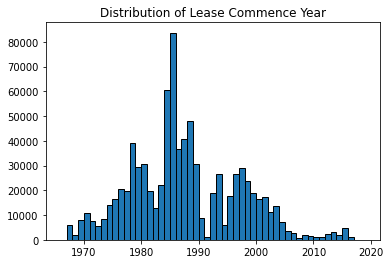

In [17]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

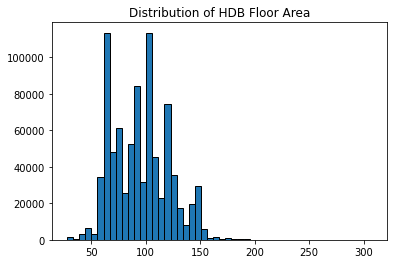

In [18]:
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()

These code blocks are part of the Exploratory Data Analysis (EDA) process, focusing on visualizing the distributions of two key features in the `prices` dataset: the year when leases commence (`lease_commence_date`) and the floor area in square meters (`floor_area_sqm`). EDA is a crucial step in data analysis, helping to understand the underlying patterns, spotting outliers or anomalies, and making informed decisions about further data processing or analysis strategies.

### Distribution of Lease Commence Year
- **Purpose**: To visualize how the commencement years of leases are distributed across the dataset. This helps in understanding the age profile of properties, which can be crucial for valuations, demand estimations, and identifying trends over time.
- **Bins Calculation**: The number of bins is set to the range between the maximum and minimum lease commencement years, providing a granular view where each bin represents one year.
- **Visualization**: A histogram is plotted with `lease_commence_date` on the x-axis, showing the frequency of properties commencing their lease in each year. The `edgecolor` is set to black to clearly delineate each bin.

### Distribution of HDB Floor Area
- **Purpose**: To analyze the spread and central tendencies of property sizes, which is vital for understanding market segments, pricing strategies, and customer preferences.
- **Fixed Bins**: Here, a fixed number of 50 bins is used to distribute the floor area data, offering a balance between granularity and readability.
- **Visualization**: A histogram is plotted with `floor_area_sqm` on the x-axis, illustrating how property sizes are distributed, with the `edgecolor` again set to black to improve clarity between bins.

### Why These Are Needed in EDA:
- **Insight into Data Structure**: Helps in comprehending the structure and range of key variables.
- **Trend Identification**: Facilitates spotting of trends over time (e.g., increases in floor areas or shifts in lease commence years).
- **Data Cleaning Guidance**: Outliers or unusual patterns may indicate errors or anomalies that need addressing.
- **Foundation for Analysis**: Informs subsequent analyses by highlighting significant characteristics of the dataset.

Overall, these visualizations provide foundational insights into the dataset, guiding further analysis and decision-making processes.

## Data Preprocessing

Data preprocessing is an essential step in machine learning because it directly influences the performance and effectiveness of models. <br/><br/>
Raw data often contains irregularities such as missing values, inconsistencies, and outliers, which can distort model training and lead to inaccurate predictions. Preprocessing includes cleaning, normalization, encoding categorical variables, and feature engineering, aiming to convert raw data into a structured format. <br/><br/>
This process enhances model accuracy by ensuring that the data fed into algorithms is meaningful and representative of the underlying problem domain. Additionally, preprocessing can significantly improve computational efficiency, making models faster and more scalable. In essence, data preprocessing lays the groundwork for developing robust, accurate, and efficient machine learning models.


In [19]:
prices['flat_type'].value_counts()

4 ROOM              314274
3 ROOM              277931
5 ROOM              173518
EXECUTIVE            63995
2 ROOM               10096
1 ROOM                1299
MULTI GENERATION       279
MULTI-GENERATION       239
Name: flat_type, dtype: int64

In [20]:
# Clean flat type
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [21]:
prices['flat_model'].value_counts()

Model A                   161295
Improved                  147996
New Generation            101942
NEW GENERATION             78898
IMPROVED                   73593
MODEL A                    70381
Premium Apartment          36017
Simplified                 31922
Standard                   23442
SIMPLIFIED                 23258
Apartment                  22831
STANDARD                   17375
Maisonette                 15101
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9325
DBSS                        1476
Adjoined flat               1119
MODEL A-MAISONETTE           982
Model A-Maisonette           912
Terrace                      404
MULTI GENERATION             279
TERRACE                      247
Multi Generation             239
Type S1                      136
Premium Maisonette            84
Type S2                       74
Improved-Maisonette           72
IMPROVED-MAISONETTE           44
Premium Apartment Loft        26
2-ROOM    

In [22]:
# Rename flat model duplicates 
# Good example will be the premium flats, lots of various types but doesn't really matter
# Since we're seeing macro now

replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()

Model A                 231676
Improved                221589
New Generation          180840
Simplified               55180
Standard                 40817
Premium Apartment        36049
Apartment                32732
Maisonette               29210
Model A2                  9325
DBSS                      1476
Adjoined flat             1119
Terrace                    651
Multi Generation           518
Type S1S2                  210
Executive Maisonette       200
2-room                      39
Name: flat_model, dtype: int64

In [23]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,74.666667,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,74.666667,60.894,13137.583342
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,74.666667,60.894,77511.741715


In [24]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '49 TO 51', '46 TO 48', '43 TO 45'],
      dtype=object)

In [25]:
len(prices['street_name'].unique())

568

In [26]:
prices['month']

0        1990-01-01
1        1990-01-01
2        1990-01-01
3        1990-01-01
4        1990-01-01
            ...    
841626   2020-09-01
841627   2020-09-01
841628   2020-09-01
841629   2020-09-01
841630   2020-09-01
Name: month, Length: 841631, dtype: datetime64[ns]

In [27]:
prices['cpi']

0         60.894
1         60.894
2         60.894
3         60.894
4         60.894
           ...  
841626    99.869
841627    99.869
841628    99.869
841629    99.869
841630    99.869
Name: cpi, Length: 841631, dtype: float64

In [28]:
prices['flat_model'].value_counts()

Model A                 231676
Improved                221589
New Generation          180840
Simplified               55180
Standard                 40817
Premium Apartment        36049
Apartment                32732
Maisonette               29210
Model A2                  9325
DBSS                      1476
Adjoined flat             1119
Terrace                    651
Multi Generation           518
Type S1S2                  210
Executive Maisonette       200
2-room                      39
Name: flat_model, dtype: int64

In [29]:
prices['lease_commence_date']

0         1977
1         1977
2         1977
3         1977
4         1976
          ... 
841626    1987
841627    1987
841628    1987
841629    1987
841630    1988
Name: lease_commence_date, Length: 841631, dtype: int64

In [30]:
prices['remaining_lease']

0         74.666667
1         74.666667
2         74.666667
3         74.666667
4         74.666667
            ...    
841626    66.250000
841627    65.500000
841628    66.333333
841629    66.250000
841630    66.750000
Name: remaining_lease, Length: 841631, dtype: float64

In [31]:
prices['block'].value_counts()

2       4372
1       3843
110     3234
101     3203
4       3177
        ... 
256D       1
530B       1
473A       1
294A       1
164A       1
Name: block, Length: 2454, dtype: int64

In [32]:
prices['town'].value_counts()

TAMPINES           74256
YISHUN             64743
BEDOK              62394
JURONG WEST        62211
WOODLANDS          60638
ANG MO KIO         48939
HOUGANG            46234
BUKIT BATOK        41085
CHOA CHU KANG      33661
BUKIT MERAH        31286
PASIR RIS          30859
TOA PAYOH          29148
QUEENSTOWN         26421
GEYLANG            26166
CLEMENTI           26128
BUKIT PANJANG      24580
KALLANG/WHAMPOA    24415
SENGKANG           24378
JURONG EAST        23270
SERANGOON          21433
BISHAN             19769
PUNGGOL            12224
SEMBAWANG          11219
MARINE PARADE       7566
CENTRAL AREA        6250
BUKIT TIMAH         2294
LIM CHU KANG          64
Name: town, dtype: int64

In [33]:
prices['flat_type'].value_counts()

4 ROOM              314274
3 ROOM              277931
5 ROOM              173518
EXECUTIVE            63995
2 ROOM               10096
1 ROOM                1299
MULTI GENERATION       518
Name: flat_type, dtype: int64

In [34]:
# Change flat type to numerical
prices['flat_type'] = prices['flat_type'].map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI GENERATION':7})

In [35]:
# Get year only from month column and rename column to year
prices['year'] = prices['month'].dt.year
prices.drop(columns='month', inplace=True)

In [36]:
# Take mean of storey_range and rename column to storey
def process_range(x):
    start, end = map(int, x.split(" TO "))
    return (start + end) // 2

# Apply the function to the storey_range column
prices['storey'] = prices['storey_range'].apply(lambda x: process_range(x))
prices.drop(columns='storey_range', inplace=True)

In [37]:
prices.drop(columns=['block', 'street_name'], inplace=True)

In [38]:
prices

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price,year,storey
0,ANG MO KIO,1,31.0,Improved,1977,9000.0,74.666667,60.894,14779.781259,1990,11
1,ANG MO KIO,1,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,1990,5
2,ANG MO KIO,1,31.0,Improved,1977,8000.0,74.666667,60.894,13137.583342,1990,11
3,ANG MO KIO,1,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,1990,8
4,ANG MO KIO,3,73.0,New Generation,1976,47200.0,74.666667,60.894,77511.741715,1990,5
...,...,...,...,...,...,...,...,...,...,...,...
841626,YISHUN,5,131.0,Improved,1987,440000.0,66.250000,99.869,440577.156074,2020,8
841627,YISHUN,5,122.0,Improved,1987,458000.0,65.500000,99.869,458600.767005,2020,8
841628,YISHUN,5,122.0,Improved,1987,490000.0,66.333333,99.869,490642.741992,2020,5
841629,YISHUN,6,146.0,Maisonette,1987,558000.0,66.250000,99.869,558731.938840,2020,5


Read, View, then see my Explanation

In [39]:
# Categorical columns for one hot encoding for flat_model and town
prices = pd.get_dummies(prices, columns=['town', 'flat_model'])

In [40]:
prices

,flat_type,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,cpi,real_price,year,storey,town_ANG MO KIO,...,flat_model_Maisonette,flat_model_Model A,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1S2
0,1,31.0,1977,9000.0,74.666667,60.894,14779.781259,1990,11,1,...,0,0,0,0,0,0,0,0,0,0
1,1,31.0,1977,6000.0,74.666667,60.894,9853.187506,1990,5,1,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,1977,8000.0,74.666667,60.894,13137.583342,1990,11,1,...,0,0,0,0,0,0,0,0,0,0
3,1,31.0,1977,6000.0,74.666667,60.894,9853.187506,1990,8,1,...,0,0,0,0,0,0,0,0,0,0
4,3,73.0,1976,47200.0,74.666667,60.894,77511.741715,1990,5,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841626,5,131.0,1987,440000.0,66.250000,99.869,440577.156074,2020,8,0,...,0,0,0,0,0,0,0,0,0,0
841627,5,122.0,1987,458000.0,65.500000,99.869,458600.767005,2020,8,0,...,0,0,0,0,0,0,0,0,0,0
841628,5,122.0,1987,490000.0,66.333333,99.869,490642.741992,2020,5,0,...,0,0,0,0,0,0,0,0,0,0
841629,6,146.0,1987,558000.0,66.250000,99.869,558731.938840,2020,5,0,...,1,0,0,0,0,0,0,0,0,0


The above code snipz applies one-hot encoding to the `town` and `flat_model` columns of the `prices` DataFrame. One-hot encoding is a process used to convert categorical data into a numerical format that machine learning models can interpret more effectively.

### Why It's Needed:
- **Categorical Data Handling**: Most machine learning models inherently work with numerical data and cannot directly process text or categorical data. One-hot encoding transforms these categorical variables into a format that these models can understand.
- **Removes Ordinal Relationships**: By encoding categorical variables into binary vectors, it ensures that the model does not assume an unintended order or hierarchy among the categories (e.g., one town or flat model being "greater" than another).
- **Improves Model Performance**: Proper encoding of categorical data often leads to better model performance since it allows the model to use this information effectively without making incorrect assumptions about the data.

### What the Code Does:
- **Creates Dummy Variables**: For each unique category in the `town` and `flat_model` columns, a new binary (0 or 1) column is created. If a record belongs to a particular category, the corresponding column for that category is marked with a 1, and 0 otherwise.
- **Expands the DataFrame**: The original `town` and `flat_model` columns are replaced by multiple columns in the DataFrame, each representing a possible category with binary indicators.
- **Preserves Data Integrity**: The transformation is applied directly to the `prices` DataFrame, updating it to include these new binary columns while dropping the original categorical columns.

This transformation is critical for preparing the dataset for machine learning analysis, especially in algorithms that require numerical input. By encoding categorical variables like `town` and `flat_model`, the code enhances the dataset's compatibility with these algorithms, facilitating more accurate and insightful modeling.

# Machine Learning Model

### PREFACE

Feature engineering enhances machine learning models by creating new features or modifying existing ones, improving model accuracy and performance. It ensures that the dataset is more representative of the underlying problem, allowing models to capture complex patterns more effectively.

Training and evaluation with separate datasets are crucial for developing robust models. **Training** allows the model to learn the relationships between features and outcomes. **Evaluation** on a separate test set assesses the model's performance on unseen data, ensuring it generalizes well to new, unseen instances, rather than memorizing the training data.

**Lasso and Ridge Regression** are regularization techniques used in linear regression to prevent overfitting, which occurs when a model is too complex and captures noise in the training data. **Lasso (L1 regularization)** encourages sparse models by penalizing the absolute size of coefficients, potentially reducing some coefficients to zero and thus performing feature selection. **Ridge (L2 regularization)** penalizes the square of coefficients, encouraging smaller, more diffuse coefficient values but not necessarily reducing them to zero. Both techniques help in enhancing the model's generalization capabilities by introducing a bias to reduce variance in the predictions.


### Importing ML Libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Preparing Data for Modelling

In [42]:
# Split the data into features and target
X = prices.drop('resale_price',axis=1)
y = prices['resale_price']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Scale the data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Model Training and Evaluation

In [44]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
print("Linear Regression Train Score: ", model.score(X_train, y_train))
print("Linear Regression Test Score: ", model.score(X_test, y_test))

Linear Regression Train Score:  0.9835462186449706
Linear Regression Test Score:  0.9834579994833492


In [45]:
# Prediction on 1 sample HDB flat
sample = X_test[1].reshape(1, -1)
print(sample)

print("Predicted Price: ", model.predict(sample)[0])
print("Actual Price: ", y_test.iloc[1])

[[0.66666667 0.35315985 0.49056604 0.55961844 0.19065902 0.47639861
  0.23333333 0.125      0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
Predicted Price:  451208.5
Actual Price:  438000.0


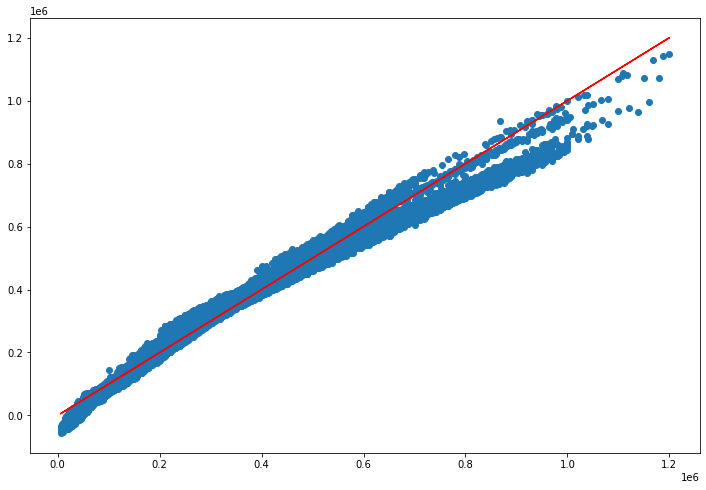

In [46]:
# Plotting the actual vs predicted prices
pred = model.predict(X_test)

plt.figure(figsize=(12,8))
# Scatter plot of actual vs predicted (our predictions)
plt.scatter(y_test,pred) 

# Perfect predictions. Red line to show where y_test = pred.
plt.plot(y_test,y_test,'r') 

## Lasso and Ridge Regression Model Training and Evaluation

In [47]:
# Lasso Regression
lasso_model = Lasso(alpha=0.5, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Model Evaluation
print("Lasso Train Score: ", lasso_model.score(X_train, y_train))
print("Lasso Test Score: ", lasso_model.score(X_test, y_test))

Lasso Train Score:  0.9835458244101669
Lasso Test Score:  0.9834581345737717


In [48]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Model Evaluation
print("Ridge Train Score: ", ridge_model.score(X_train, y_train))
print("Ridge Test Score: ", ridge_model.score(X_test, y_test))

Ridge Train Score:  0.9835462514686028
Ridge Test Score:  0.9834582805416577


# Conclusion

Building Machine Learning models starts with data, garbage in garbage out. Data preprocessing is the most important step in building a model. The model is only as good as the data it is trained on. 

Most of the steps done in this notebook are data preprocessing steps. The actual model building is only a small part of the process. Also the model is built by just importing the Scikit-learn library and using the different model functions available. 

Note that the model is not optimized and is just a simple model to show the process of building a model. The model can be further optimized by tuning the hyperparameters and using different models. Since the R2 score is high, we can more or less conclude that the model is a good fit for the data. If the R2 score is low, then we can try different models and tune the hyperparameters to get a better fit. In this case Lasso and Ridge Regression models did not offer a great improvement over the Linear Regression model so we can stick with the Linear Regression model.